# Projet Data Science Kaggle

### Objectif du projet: 
Classifier les passagers d'un vaisseau spatial pour savoir ceux qui ont survécu à l'accident.

### 1. Importation des librairies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score


C:\Users\tiemoko.sogodogo\AppData\Local\Temp\ipykernel_10468\1399268402.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 2. Chargement des données d'entrainement

In [2]:
spaceship_titanic_train = pd.read_csv('train.csv')
print(f"La taille (Lignes et colonnes) de l'ensemble des données d'entraînement : {spaceship_titanic_train.shape}")

La taille (Lignes et colonnes) de l'ensemble des données d'entraînement : (8693, 14)


### 4. Visualisation des données

In [3]:
###Affichons les 5 premiers exemples
###dataset_df.head(5) ou
spaceship_titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
###On peut constater que la moyenne d'âge est de 28 (28.827 ~ 28), dont le maximum est 79 ans.
###Avec 8514 exemples
spaceship_titanic_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Text(0, 0.5, 'Nombre')

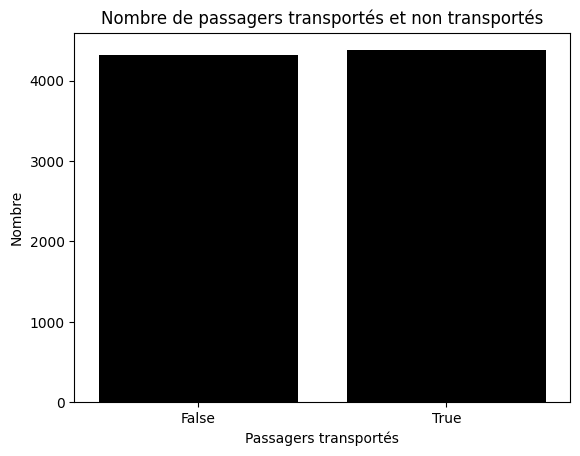

In [5]:
###Visualisation nombre de passagers transportés (True) et non transportés (False) 
###Dans nos données d'entraînement
ax = sns.countplot(spaceship_titanic_train, x='Transported', color='black')
ax.set_title('Nombre de passagers transportés et non transportés')
ax.set_xlabel('Passagers transportés')
ax.set_ylabel('Nombre')

#### Conclusion :
D'après nos remarques, nous avons presque les mêmes nombres de passagers transportés et non transportés dans nos données d'entraînement

#### Distribution de l'âge par rapport aux passagers transportés (True) et non transportés (False)

Text(0.5, 1.0, "Distribution de l'âge")

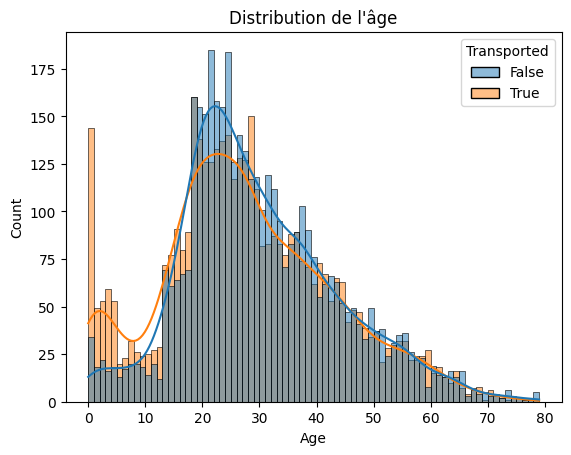

In [6]:
sns.histplot(data=spaceship_titanic_train, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Distribution de l\'âge')

#### Conclusion :
On verra que les passagers de :
- 0-18 ans étaient plus susceptibles d'être transportés que de ne pas l'être.
- 18-25 ans étaient moins susceptibles d'être transportés que de ne pas l'être.
- Les plus de 25 ans ont à peu près autant de chances d'être transportés que de ne pas l'être.

#### Les informations sur le DataFrame, notamment le type d'index et les colonnes, les valeurs non nulles et l'utilisation de la mémoire.

In [7]:
spaceship_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### 5. Préparation de nos données d'entrainement

#### NB : Supprimons les colonnes ***PassengerId*** et ***Name*** pour ne pas les traiter !

In [8]:
spaceship_titanic_train = spaceship_titanic_train.drop(['PassengerId', 'Name'], axis=1)
spaceship_titanic_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


#### 5.1. Gestion des valeurs manquantes

In [9]:
###Moyenne des valeurs manquantes dans chaque variable
spaceship_titanic_train.isnull().mean().sort_values(ascending=False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Cabin           0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
Transported     0.000000
dtype: float64

Nous remarquons qu'il y a beaucoup de valeurs manquantes. Pour remédier à cela, nous allons essayer deux méthodes.

#### 5.1.1. Première methode pour gérer les valeurs manquantes
Processus : Nous allons sélectionner aléatoirement des valeurs pour chaque variable du dataset afin de remplacer les valeurs manquantes, ainsi nous ne perdrons pas nos données.

In [10]:
def filled_missing_values_with_random(dataset):
    df = dataset.copy()
    null_values = df.isnull().sum().sort_values(ascending=False)
    for col in null_values.index:
        if null_values[col] != 0:
            new_col = col + '_filled'
            df[new_col] = df[col].copy()

            random_sample = df[col].dropna().sample(df[col].isnull().sum(), random_state=0)
            random_sample.index = df[df[col].isnull()].index

            df.loc[df[col].isnull(), new_col] = random_sample
            
    return df

In [11]:
random_result = filled_missing_values_with_random(spaceship_titanic_train)
random_result.isnull().sum().sort_values(ascending=False)


CryoSleep              217
ShoppingMall           208
VIP                    203
HomePlanet             201
Cabin                  199
VRDeck                 188
FoodCourt              183
Spa                    183
Destination            182
RoomService            181
Age                    179
VRDeck_filled            0
RoomService_filled       0
Destination_filled       0
Spa_filled               0
FoodCourt_filled         0
Transported              0
Cabin_filled             0
HomePlanet_filled        0
VIP_filled               0
ShoppingMall_filled      0
CryoSleep_filled         0
Age_filled               0
dtype: int64

In [12]:
def compare_distributions(dataset):
    ###Sélectionner les colonnes numériques et catégorielles
    numeric_columns = dataset.select_dtypes(include=['number']).columns
    categorical_columns = dataset.select_dtypes(include=['object']).columns
    
    ###Comparaison des distributions pour les colonnes numériques
    for var in numeric_columns:
        var_filled = var + '_filled'
        if var_filled in dataset.columns:
            plt.figure(figsize=(6, 4))  # Taille plus petite
            dataset[var].plot(kind='kde', label=f"{var} original", color='blue')
            dataset[var_filled].plot(kind='kde', label=f"{var} filled", color='red')
            plt.title(f"Distribution de {var}")
            plt.legend()
            plt.xlabel(var)
            plt.ylabel('Density')
            plt.xlim(dataset[var].min(), dataset[var].max())
            plt.ylim(0, None)
    
    ###Comparaison des distributions pour les colonnes catégorielles
    for var in categorical_columns:
        var_filled = var + '_filled'
        if var_filled in dataset.columns:
            plt.figure(figsize=(4, 3))  # Taille plus petite
            dataset[var].value_counts(normalize=True).plot(kind='bar', alpha=0.5, label=f"{var} original", color='blue')
            dataset[var_filled].value_counts(normalize=True).plot(kind='bar', alpha=0.5, label=f"{var} filled", color='red')
            plt.title(f"Distribution de {var}")
            plt.legend()
            plt.xlabel(var)
            plt.ylabel('Fréquence')
    
    plt.show()

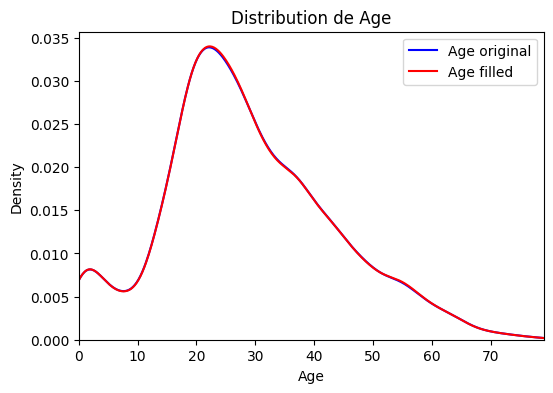

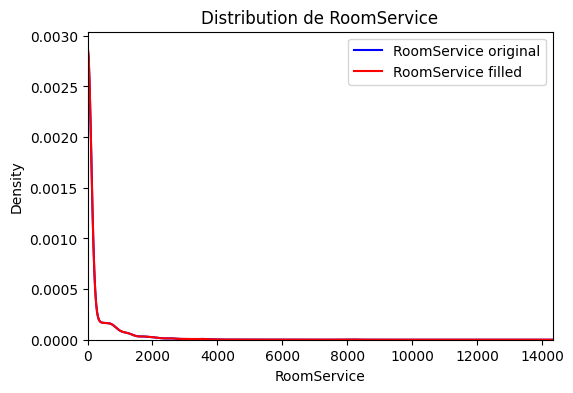

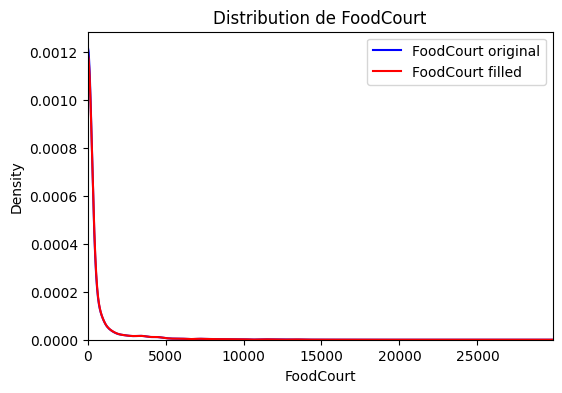

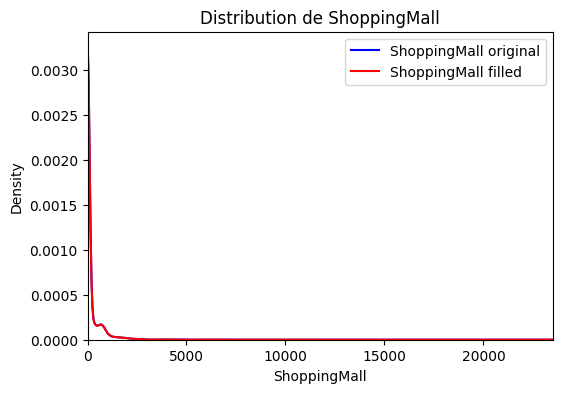

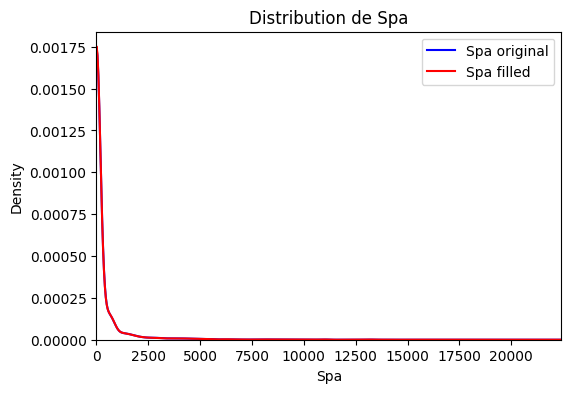

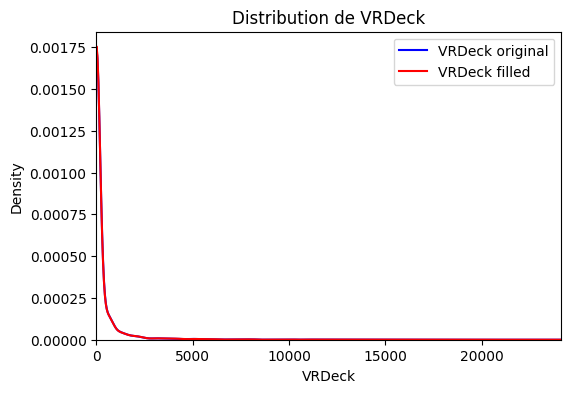

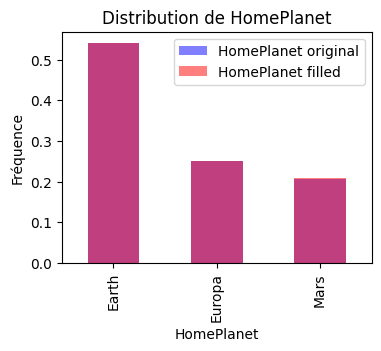

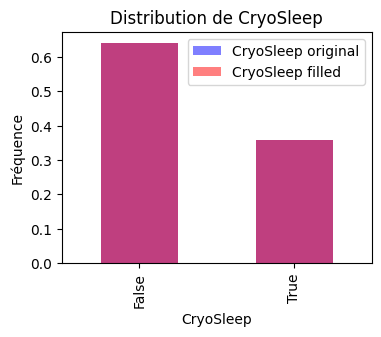

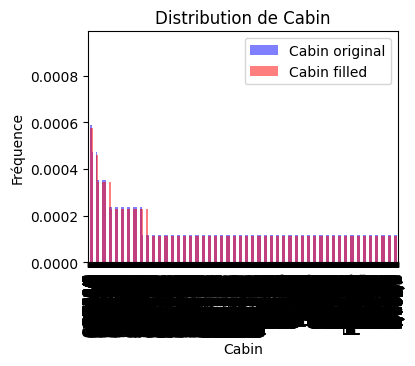

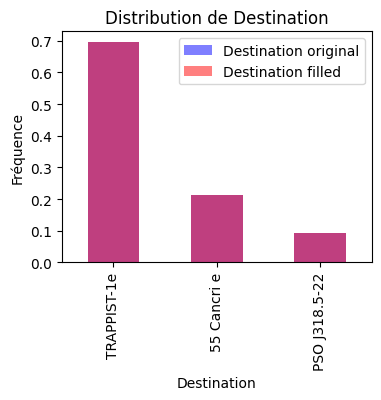

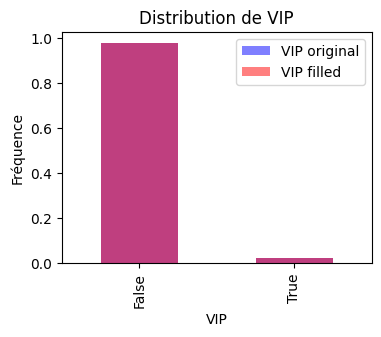

In [13]:
###Voir la distribution
compare_distributions(random_result)

#### 5.1.2. Deuxième méthode pour gérer les valeurs manquantes 
Processus : Remplacer les valeurs manquantes par le mode pour les variables et ensuite visualiser la distribution de la variable.

In [14]:
def filled_missing_values_with_mode(dataset):
    new_dataset = dataset.copy()
      
    for var in new_dataset.columns:
        if new_dataset[var].isnull().sum() > 0:
            mode_value = new_dataset[var].mode()[0]  
            new_var_name = var + '_filled'  
            new_dataset[new_var_name] = new_dataset[var].fillna(mode_value)  
            
    return new_dataset

In [15]:
mode_result = filled_missing_values_with_mode(spaceship_titanic_train)
mode_result.isnull().sum().sort_values(ascending= True)

C:\Users\tiemoko.sogodogo\AppData\Local\Temp\ipykernel_10468\1513150926.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_dataset[new_var_name] = new_dataset[var].fillna(mode_value)
C:\Users\tiemoko.sogodogo\AppData\Local\Temp\ipykernel_10468\1513150926.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_dataset[new_var_name] = new_dataset[var].fillna(mode_value)


Transported              0
ShoppingMall_filled      0
FoodCourt_filled         0
RoomService_filled       0
VIP_filled               0
Age_filled               0
Destination_filled       0
Cabin_filled             0
CryoSleep_filled         0
HomePlanet_filled        0
Spa_filled               0
VRDeck_filled            0
Age                    179
RoomService            181
Destination            182
Spa                    183
FoodCourt              183
VRDeck                 188
Cabin                  199
HomePlanet             201
VIP                    203
ShoppingMall           208
CryoSleep              217
dtype: int64

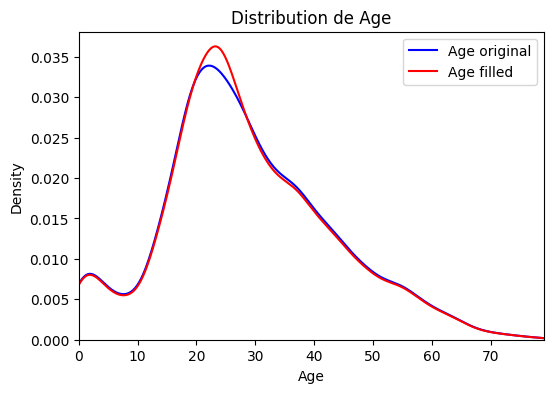

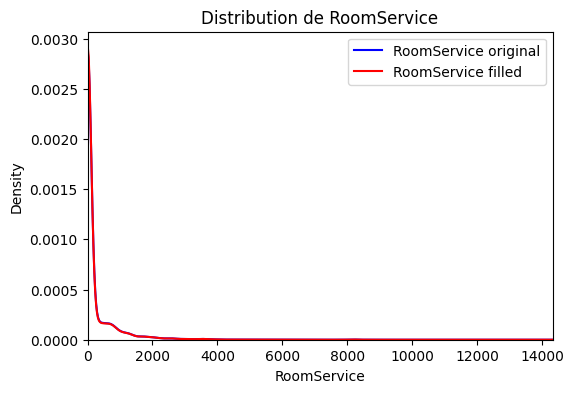

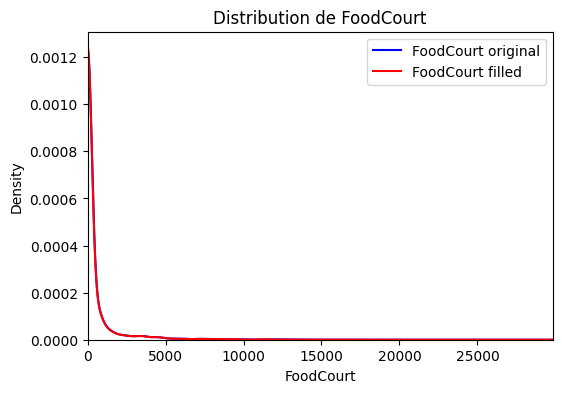

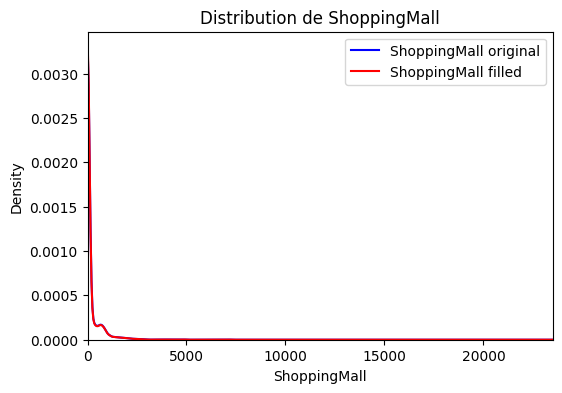

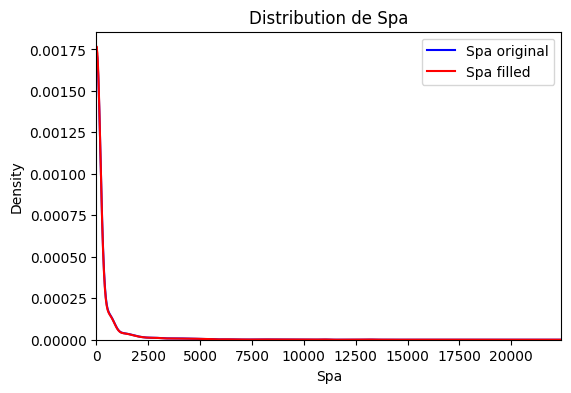

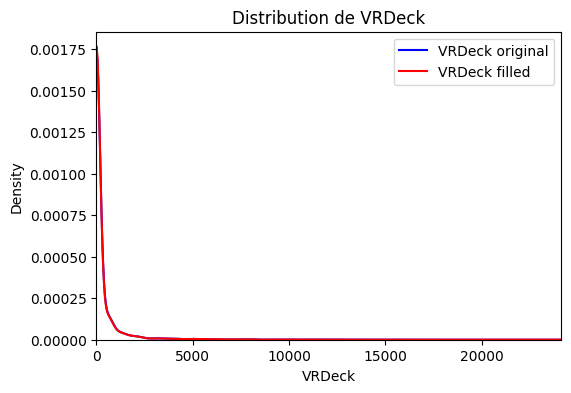

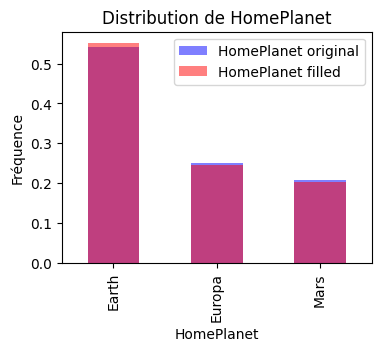

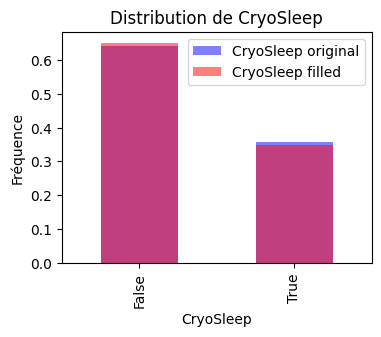

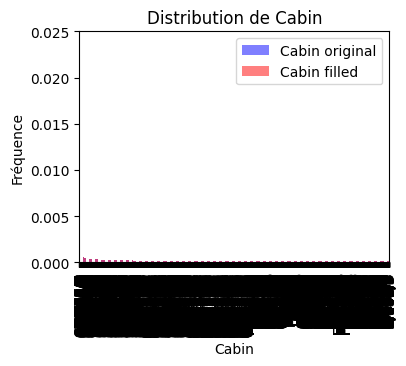

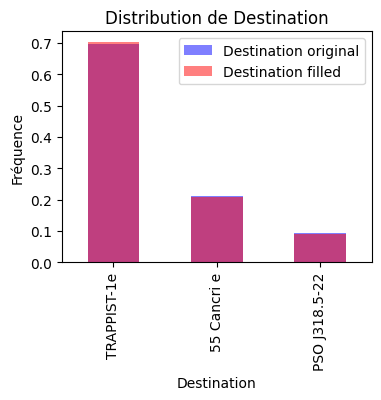

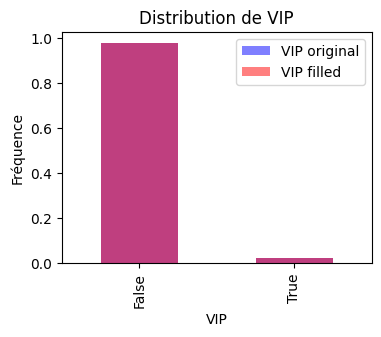

In [16]:
###Voir la distribution
compare_distributions(mode_result)

#### Conclusion de cette étape:
Vu que la distribution des variables avec le remplacement des valeurs manquantes par les valeurs aléaroires ne semble pas changer on peut alors conclure que c'est une bonne méthode et qu'on peut utiliser les variables de ce dataset pour effectuer nos analyses

#### 5.2. Suppression des colonnes non importantes

In [17]:
random_result.head(2)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,ShoppingMall_filled,VIP_filled,HomePlanet_filled,Cabin_filled,VRDeck_filled,FoodCourt_filled,Spa_filled,Destination_filled,RoomService_filled,Age_filled
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0.0,False,Europa,B/0/P,0.0,0.0,0.0,TRAPPIST-1e,0.0,39.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,25.0,False,Earth,F/0/S,44.0,9.0,549.0,TRAPPIST-1e,109.0,24.0


In [18]:
###Suppression des colonnes non importantes pour nos données d'entraînement
random_result = random_result.drop(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',], axis=1)
random_result.head()

,Transported,CryoSleep_filled,ShoppingMall_filled,VIP_filled,HomePlanet_filled,Cabin_filled,VRDeck_filled,FoodCourt_filled,Spa_filled,Destination_filled,RoomService_filled,Age_filled
0,False,False,0.0,False,Europa,B/0/P,0.0,0.0,0.0,TRAPPIST-1e,0.0,39.0
1,True,False,25.0,False,Earth,F/0/S,44.0,9.0,549.0,TRAPPIST-1e,109.0,24.0
2,False,False,0.0,True,Europa,A/0/S,49.0,3576.0,6715.0,TRAPPIST-1e,43.0,58.0
3,False,False,371.0,False,Europa,A/0/S,193.0,1283.0,3329.0,TRAPPIST-1e,0.0,33.0
4,True,False,151.0,False,Earth,F/1/S,2.0,70.0,565.0,TRAPPIST-1e,303.0,16.0


#### 5.3. Gestion des doublons

In [19]:
###Voir le nombre de doublons
random_result.duplicated().sum()

14

In [20]:
###On supprime ces doublons
random_result.drop_duplicates(inplace=True)

In [21]:
###Voyons maintenant le nombre de doublons
random_result.duplicated().sum()

0

#### 5.4. Gestion des valeurs aberrantes

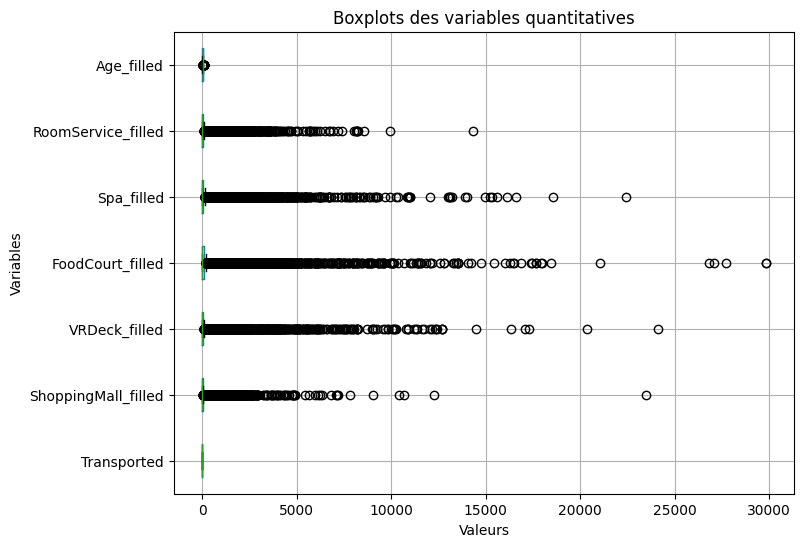

In [22]:
###Voyons d'abord les valeurs aberrantes
plt.figure(figsize=(8, 6))
random_result.boxplot(vert=False)
plt.title("Boxplots des variables quantitatives")
plt.xlabel("Valeurs")
plt.ylabel("Variables")
plt.show()

#### Conclusion : 
Vu que les valeurs aberrantes sont assez minimes dans nos données on peut décider de ne pas les gérer 

### 6.  Entrainement sur le dataset selectionné avec plusieurs modèles

In [23]:
###Une fonction qui permet de convertir les colonnes catégorielles en numériques
def preprocess_data(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    
    return df, label_encoders


In [24]:
###Une fonction qui entraine et teste nos données avec le modèle donné
def test_model_on_dataset(model, target_column='Transported'):
    global random_result

    ###Convertir la variable target_column en entier
    random_result[target_column] = random_result[target_column].astype(int)
    random_result, _ = preprocess_data(random_result)

    X = random_result.drop(columns=[target_column])
    y = random_result[target_column]

    ###Prétraitement des données avec la mise à l'échelle
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    ###Ajustement du modèle sur l'ensemble d'entraînement
    model.fit(X_train, y_train)

    ###Prédire les résultats sur l'ensemble de test
    y_pred = model.predict(X_test)

    print(f'Les métriques de performance pour le modèle {model.__class__.__name__} sont :')

    ###L'accuracy du modèle
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")

    ###La matrice de confusion
    # print(f"La matrice de confusion : \n{confusion_matrix(y_test, y_pred)}")

    ###Le score de précision
    print(f'Le score de précision : {precision_score(y_test, y_pred):.4f}')

    ###Le recall est également appelé sensibilité
    print(f'Le recall est également appelé sensibilité : {recall_score(y_test, y_pred):.4f}')

    ###Le score F1
    print(f'Le score F1 : {f1_score(y_test, y_pred):.4f}')

In [25]:
def test_multi_models_on_dataset(models):
    ###Faisons une boucle pour tester et donner le resultat de tous les models definis dans la variable models
    for _, model in models:
        test_model_on_dataset(model)

In [26]:
###Definition des models afin de les utiliser 
models = [
    ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('SVC', SVC(random_state=42)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42))
]

test_multi_models_on_dataset(models)

Les métriques de performance pour le modèle RandomForestClassifier sont :
Accuracy : 0.7851
Le score de précision : 0.7939
Le recall est également appelé sensibilité : 0.7729
Le score F1 : 0.7833
Les métriques de performance pour le modèle LogisticRegression sont :
Accuracy : 0.7632
Le score de précision : 0.7471
Le recall est également appelé sensibilité : 0.7993
Le score F1 : 0.7723
Les métriques de performance pour le modèle SVC sont :
Accuracy : 0.7886
Le score de précision : 0.7809
Le recall est également appelé sensibilité : 0.8050
Le score F1 : 0.7928
Les métriques de performance pour le modèle KNeighborsClassifier sont :
Accuracy : 0.7661
Le score de précision : 0.7572
Le recall est également appelé sensibilité : 0.7867
Le score F1 : 0.7717
Les métriques de performance pour le modèle DecisionTreeClassifier sont :
Accuracy : 0.7396
Le score de précision : 0.7239
Le recall est également appelé sensibilité : 0.7787
Le score F1 : 0.7503


### 7. Optimization des resultats

In [27]:
target_column='Transported'
random_result[target_column] = random_result[target_column].astype(int)
random_result, _ = preprocess_data(random_result)

X = random_result.drop(columns=[target_column])
y = random_result[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### 7.1 Avec GridSearch

In [28]:
models_score_results = []
def make_grid_search_cv(name, model, param_grid):
    _grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=3)
    _grid.fit(X_train, y_train)
    models_score_results.append((name, _grid.best_params_, _grid.best_score_))
    print(f"Meilleurs paramètres pour {name}: {_grid.best_params_}")
    print(f"Meilleure score pour {name}: {_grid.best_score_}")

In [29]:
###Definir plusieurs modèles avec ces hyperparamètres
models = [
    (
        'KNeighborsClassifier',
        KNeighborsClassifier(),
        {
            'n_neighbors': [5, 50, 100],
            'weights': ['uniform', "distance"],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [30, 60, 90],
            'n_jobs': [1, 2]
        }
    ),
    
    (
        'SVC',
        SVC(random_state=42),
        {
            'kernel': ['rbf', 'linear', 'sigmoid'],
            'gamma': ['scale', 1, 0.1, 0.01, 0.001],
            'C': [0.1, 1, 10, 100]
        }
    ),

    (
        'RandomForestClassifier',
        RandomForestClassifier(random_state=42),
        {
            'n_estimators': [100, 200, 300],
            'max_features': [None, 'sqrt', 'log2'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    ),

    (
        'LogisticRegression',
        LogisticRegression(random_state=42),
        {
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'max_iter': [1000, 2000, 3000]
        }
    ),

    (
        'DecisionTreeClassifier',
        DecisionTreeClassifier(random_state=42),
        {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': [None, 'sqrt', 'log2'],
            'max_depth': [None, 10, 20, 40, 50],
            'min_samples_split': [10, 20, 40, 80, 100, 1000, 2000],
            'min_samples_leaf': [4, 8, 16, 32, 64, 100]
        }
    ),
]

In [30]:
###Testons GridSearchCV avec ces modèles
###Cela peut prendre beaucoup,
###du coup on l'a fait de façon individuel
for name, model, parameters in models:
    make_grid_search_cv(name, model, parameters)

models_score_results

[]

In [31]:
###Voici les meilleurs hyperparamètres pour chaque modèle selon GridSearchCV
###[('KNeighborsClassifier',{'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': 1, 'n_neighbors': 50, 'weights': 'distance'}, 0.7771844650122516)]
###[('SVC', {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, 0.7845309896822087)]
###[('RandomForestClassifier', {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, n_estimators': 300}, 0.7990761084934531)]
###[('LogisticRegression', {'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}, 0.7812156237875609)]
###[('DecisionTreeClassifier', {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 32, 'min_samples_split': 100}, 0.7799213872688456)]

###On définit une liste de modèle avec ces hyperparamètres
models = [
    (
        'KNeighborsClassifier',
        KNeighborsClassifier
        (
            algorithm='auto',
            leaf_size=30,
            n_jobs=1,
            n_neighbors=50,
            weights='distance'
        )
    ),

    (
        'SVC',
        SVC(
            random_state=42,
            C=1,
            gamma='scale',
            kernel='rbf'
        )
    ),

    (
        'RandomForestClassifier',
        RandomForestClassifier
        (
            random_state=42,
            max_depth=20,
            min_samples_leaf=2,
            min_samples_split=2,
            n_estimators=300,
            max_features='sqrt'
        )
    ),

    (
        'LogisticRegression',
        LogisticRegression
        (
            random_state=42,
            max_iter=1000,
            penalty='l2',
            solver='lbfgs'
        )
    ),

    (
        'DecisionTreeClassifier',
        DecisionTreeClassifier
        (
            random_state=42,
            criterion='entropy',
            max_depth=None,
            max_features=None,
            min_samples_leaf=32,
            min_samples_split=100
        )
    )
]

test_multi_models_on_dataset(models)

Les métriques de performance pour le modèle KNeighborsClassifier sont :
Accuracy : 0.7742
Le score de précision : 0.7691
Le recall est également appelé sensibilité : 0.7867
Le score F1 : 0.7778
Les métriques de performance pour le modèle SVC sont :
Accuracy : 0.7886
Le score de précision : 0.7809
Le recall est également appelé sensibilité : 0.8050
Le score F1 : 0.7928
Les métriques de performance pour le modèle RandomForestClassifier sont :
Accuracy : 0.8007
Le score de précision : 0.7846
Le recall est également appelé sensibilité : 0.8314
Le score F1 : 0.8073
Les métriques de performance pour le modèle LogisticRegression sont :
Accuracy : 0.7632
Le score de précision : 0.7471
Le recall est également appelé sensibilité : 0.7993
Le score F1 : 0.7723
Les métriques de performance pour le modèle DecisionTreeClassifier sont :
Accuracy : 0.7736
Le score de précision : 0.7617
Le recall est également appelé sensibilité : 0.7993
Le score F1 : 0.7801


#### 7.2 Stacking Classifier

In [32]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

In [33]:
stackingclassifier = StackingClassifier(
    estimators=models,
    verbose=100
)

In [34]:
stackingclassifier.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    8.5s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   11.4s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   13.9s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:   13.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:   12.3s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:   18.6s
[Parallel(n_jobs=1)]: Do

StackingClassifier(estimators=[('KNeighborsClassifier',
                                KNeighborsClassifier(n_jobs=1, n_neighbors=50,
                                                     weights='distance')),
                               ('SVC', SVC(C=1, random_state=42)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_leaf=2,
                                                       n_estimators=300,
                                                       random_state=42)),
                               ('LogisticRegression',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier(criterion='entropy',
                                                       min_samples_leaf=32,
                                                       min_samples_split=100,
                                                       random_state=42))],
                   verbose=100)

In [35]:
stackingclassifier.score(X_test, y_test)

0.7955069124423964

#### 7.3 Voting Classifier

In [36]:
voting_hard = VotingClassifier(
    estimators=models,
    voting='hard',
    verbose=100,
)

In [37]:
voting_hard.fit(X_train, y_train)

[Voting] ..... (1 of 5) Processing KNeighborsClassifier, total=   0.2s
[Voting] ...................... (2 of 5) Processing SVC, total=  17.0s
[Voting] ... (3 of 5) Processing RandomForestClassifier, total=  26.1s
[Voting] ....... (4 of 5) Processing LogisticRegression, total=   0.1s
[Voting] ... (5 of 5) Processing DecisionTreeClassifier, total=   0.3s


VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_jobs=1, n_neighbors=50,
                                                   weights='distance')),
                             ('SVC', SVC(C=1, random_state=42)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=2,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('LogisticRegression',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(criterion='entropy',
                                                     min_samples_leaf=32,
                                                     min_samples_split=100,
                                                     random_state=42))],
                 verbose=100)

In [38]:
voting_hard.score(X_test, y_test)

0.7949308755760369

##### Conclusion
On constate que la technique avec GridSearchCV donne de meilleure performance avec RandomForestClassifier qu'avec les stacking et voting classifier. Du coup, notre modèle final sera RandomForestClassifier avec les hyperparamètres fournies par GridSearchCV.

In [39]:
selected_model = RandomForestClassifier(
    random_state=42,
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=300,
    max_features='sqrt'
)

test_model_on_dataset(selected_model)

Les métriques de performance pour le modèle RandomForestClassifier sont :
Accuracy : 0.8007
Le score de précision : 0.7846
Le recall est également appelé sensibilité : 0.8314
Le score F1 : 0.8073


### 8. Chargement des données de test 

In [40]:
spaceship_titanic_test = pd.read_csv('test.csv')
print(f"La taille (Lignes et colonnes) de l'ensemble des données de test : {spaceship_titanic_test.shape}")

La taille (Lignes et colonnes) de l'ensemble des données de test : (4277, 13)


### 9. Visualisation des données de test

In [41]:
spaceship_titanic_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### 10. Préparation de nos données de test

#### NB : Supprimons la colonne ***Name*** pour ne pas les traiter !

In [42]:
spaceship_titanic_test = spaceship_titanic_test.drop(['Name'], axis=1)
spaceship_titanic_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


### 11. Gestion des valeurs manquantes

In [43]:
###Moyenne des valeurs manquantes dans chaque variable
spaceship_titanic_test.isnull().mean().sort_values(ascending=False)

FoodCourt       0.024784
Spa             0.023615
Cabin           0.023381
ShoppingMall    0.022913
CryoSleep       0.021744
VIP             0.021744
Destination     0.021510
Age             0.021277
HomePlanet      0.020341
RoomService     0.019172
VRDeck          0.018705
PassengerId     0.000000
dtype: float64

In [44]:
spaceship_titanic_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [45]:
random_result_test = filled_missing_values_with_random(spaceship_titanic_test)
random_result_test.isnull().sum().sort_values(ascending=False)


FoodCourt              106
Spa                    101
Cabin                  100
ShoppingMall            98
CryoSleep               93
VIP                     93
Destination             92
Age                     91
HomePlanet              87
RoomService             82
VRDeck                  80
VIP_filled               0
RoomService_filled       0
HomePlanet_filled        0
Age_filled               0
Destination_filled       0
PassengerId              0
CryoSleep_filled         0
ShoppingMall_filled      0
Cabin_filled             0
Spa_filled               0
FoodCourt_filled         0
VRDeck_filled            0
dtype: int64

In [46]:
###Suppression des colonnes non importantes pour nos données de test
random_result_test = random_result_test.drop(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',], axis=1)
random_result_test.head()

,PassengerId,FoodCourt_filled,Spa_filled,Cabin_filled,ShoppingMall_filled,CryoSleep_filled,VIP_filled,Destination_filled,Age_filled,HomePlanet_filled,RoomService_filled,VRDeck_filled
0,0013_01,0.0,0.0,G/3/S,0.0,True,False,TRAPPIST-1e,27.0,Earth,0.0,0.0
1,0018_01,9.0,2823.0,F/4/S,0.0,False,False,TRAPPIST-1e,19.0,Earth,0.0,0.0
2,0019_01,0.0,0.0,C/0/S,0.0,True,False,55 Cancri e,31.0,Europa,0.0,0.0
3,0021_01,6652.0,181.0,C/1/S,0.0,False,False,TRAPPIST-1e,38.0,Europa,0.0,585.0
4,0023_01,0.0,0.0,F/5/S,635.0,False,False,TRAPPIST-1e,20.0,Earth,10.0,0.0


In [47]:
###Voir le nombre de doublons
random_result_test.duplicated().sum()

0

In [48]:
test_passenger_id = random_result_test['PassengerId'] # On aura besoin pour la soumission
random_result_test = random_result_test.drop(['PassengerId'], axis=1) # On supprime PassengerId de nos données
test_passenger_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

### 12. Test du modèle selectionné sur les données de test

In [49]:
random_result_test, _ = preprocess_data(random_result_test)

###Prétraitement des données avec la mise à l'échelle
scaler = StandardScaler()
random_result_test = scaler.fit_transform(random_result_test)

In [50]:
###On fait la prédiction sur les données de test
test_predictions = selected_model.predict(random_result_test)
test_predictions

array([1, 1, 0, ..., 0, 1, 0])

In [51]:
###On crée un data frame pour le fichier de submission
tiemoko_soukouna_final_submission = pd.DataFrame({'PassengerId': test_passenger_id, 'Transported': test_predictions})

###Remplaçons les 0 en False et les 1 en True
tiemoko_soukouna_final_submission.replace({0: False, 1: True}, inplace=True)

###On enregistre le fichier de submission
tiemoko_soukouna_final_submission.to_csv('tiemoko_soukouna_final_submission.csv', index=False)
tiemoko_soukouna_final_submission

C:\Users\tiemoko.sogodogo\AppData\Local\Temp\ipykernel_10468\2859803659.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tiemoko_soukouna_final_submission.replace({0: False, 1: True}, inplace=True)


,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,False
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,True
